# Split ring resonators
From _Magnetic Response of Metamaterials at 100 Terahertz_

In [2]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 60  # pixels/um

pol = mp.Ey # Incident polarization

# Dimensions in um
l = .320
w = .090
a = .450 # Lattice constant
gap = .070

t = .020 # Thickness in um

# Dimensions of the cell
sep = a - l # Sepparation between resonators
width = l + sep
height = l + sep

st = 10*a # Substrate thickness
depth = 2*st

cell = mp.Vector3(a, a, depth) # 3D cell

# PML layers
dpml = 2 # Width of the PML
pml = mp.PML(dpml, direction=mp.Z) # PML in the non-periodic direction

# Wavelengths in um
wmin = 1.5 # minimum wavelength
wmax = 5 # maximum wavelength
wcen = (wmax-wmin)/2 + wmin # central wavelength

fmin = 1/wmax # minimum frequency
fmax = 1/wmin # maximum frequency
fcen = (fmax-fmin)/2 + fmin # central frequency
nfreqs = 100 # number of frequencies calculated

sources = [
    mp.Source(mp.GaussianSource(fcen, fwidth=fmax-fmin),
              component=pol,
              center=mp.Vector3(0,0,-depth/2+dpml),
              size=mp.Vector3(a, a, 0)),
]

# symmetries = [mp.Mirror(mp.Y)]

In [3]:
refl_fr = mp.ModeRegion(center=mp.Vector3(0,0,-depth/2+dpml+0.2), size=mp.Vector3(width, height, 0))
tran_fr = mp.ModeRegion(center=mp.Vector3(0,0,depth/2-dpml-0.1), size=mp.Vector3(width, height, 0))

In [4]:
c_ = 299792458
wp = 2.175e15/(c_*1e6) # Plasma frequency
gamma = 6.5e12/(c_*1e6) # Collision frequency
susc = mp.DrudeSusceptibility(frequency=wp, gamma=gamma*1.65, sigma=1)

Gold = mp.Medium(epsilon=1, E_susceptibilities=[susc])

In [5]:
gamma

0.021681666187879884

In [6]:
from meep.materials import Au, SiO2

n_SiO2 = 1.4059

# substrate = SiO2
metal = Gold
# substrate = mp.Medium(index=n_SiO2)

# Define the geometry
geometry = [
    # mp.Block(size=mp.Vector3(mp.inf, mp.inf, depth/2), center=mp.Vector3(0,0,depth/4), material=substrate),
    mp.Block(size=mp.Vector3(t, w, l), center=mp.Vector3(0, l/2-w/2, 0), material=metal),
    mp.Block(size=mp.Vector3(t, w, l), center=mp.Vector3(0, -l/2+w/2, 0), material=metal),
    mp.Block(size=mp.Vector3(t, l, w), center=mp.Vector3(0, 0, l/2-w/2), material=metal),
    mp.Block(size=mp.Vector3(t, l, w), center=mp.Vector3(0, 0, -l/2+w/2), material=metal),
    mp.Block(size=mp.Vector3(t, w, gap), center=mp.Vector3(0, l/2-w/2, 0), material=mp.Medium(epsilon=1)), # Gap
]

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=[pml],
    geometry=geometry,
    k_point=mp.Vector3(0,0,0), # Periodicity
    sources=sources,
    # symmetries=symmetries,
    resolution=resolution)

refl = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, refl_fr)
tran = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, tran_fr)


In [7]:
refl = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, refl_fr)
tran = sim.add_mode_monitor(fcen, fmax-fmin, nfreqs, tran_fr)

freqs = mp.get_flux_freqs(refl)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00803995 s
Working in 3D dimensions.
Computational cell is 0.45 x 0.45 x 9 with resolution 60
     block, center = (0,0.115,0)
          size (0.02,0.09,0.32)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,0)
          size (0.02,0.09,0.32)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.115)
          size (0.02,0.32,0.09)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.115)
          size (0.02,0.32,0.09)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0.115,0)
          size (0.02,0.09,0.07)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsi

     block, center = (0,0.115,0)
          size (0.02,0.09,0.32)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,0)
          size (0.02,0.09,0.32)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.115)
          size (0.02,0.32,0.09)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.115)
          size (0.02,0.32,0.09)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0.115,0)
          size (0.02,0.09,0.07)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='Y', ylabel='Z'>

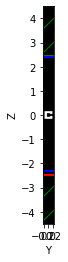

In [8]:
sim.plot2D(output_plane=mp.Volume(size=mp.Vector3(0, a, depth), center=mp.Vector3(0,0,0)))

In [9]:
# from playsound import playsound

pt = mp.Vector3(0,0,depth/2-dpml-0.1)
sim.run(until_after_sources=mp.stop_when_fields_decayed(50,pol,pt,0.001))

# playsound('alarm.mp3')

refl_flux = mp.get_fluxes(refl)
tran_flux = mp.get_fluxes(tran)

on time step 93 (time=0.775), 0.0433885 s/step
on time step 291 (time=2.425), 0.0202378 s/step
on time step 504 (time=4.2), 0.0188738 s/step
on time step 705 (time=5.875), 0.0199323 s/step
on time step 906 (time=7.55), 0.0199113 s/step
on time step 1103 (time=9.19167), 0.0203342 s/step
on time step 1323 (time=11.025), 0.0181821 s/step
on time step 1544 (time=12.8667), 0.0181139 s/step
on time step 1741 (time=14.5083), 0.0203101 s/step
on time step 1950 (time=16.25), 0.0192535 s/step
on time step 2162 (time=18.0167), 0.0189004 s/step
on time step 2350 (time=19.5833), 0.0213872 s/step
on time step 2538 (time=21.15), 0.021406 s/step
on time step 2715 (time=22.625), 0.0226918 s/step
on time step 2876 (time=23.9667), 0.0249366 s/step
on time step 3074 (time=25.6167), 0.0203046 s/step
on time step 3271 (time=27.2583), 0.0203613 s/step
on time step 3467 (time=28.8917), 0.0204736 s/step
on time step 3666 (time=30.55), 0.0201812 s/step
on time step 3867 (time=32.225), 0.0199723 s/step
on time s

     block, center = (0,0.115,0)
          size (0.02,0.09,0.32)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-0.115,0)
          size (0.02,0.09,0.32)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0.115)
          size (0.02,0.32,0.09)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,-0.115)
          size (0.02,0.32,0.09)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0.115,0)
          size (0.02,0.09,0.07)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='Y', ylabel='Z'>

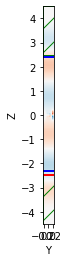

In [10]:
sim.plot2D(output_plane=mp.Volume(size=mp.Vector3(0, a, depth), center=mp.Vector3(0,0,0)), fields=pol)

In [11]:
wl = []
for i in range(nfreqs):
    wl = np.append(wl, 1/freqs[i])

---
#### S parameters

In [12]:
S11 = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
S21 = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

MPB solved for frequency_1(0,0,0.2) = 0.2 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.200000)
MPB solved for frequency_1(0,0,0.204714) = 0.204714 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.204714)
MPB solved for frequency_1(0,0,0.209428) = 0.209428 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.209428)
MPB solved for frequency_1(0,0,0.214141) = 0.214141 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.214141)
MPB solved for frequency_1(0,0,0.218855) = 0.218855 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.218855)
MPB solved for frequency_1(0,0,0.223569) = 0.223569 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.223569)
MPB solved for frequency_1(0,0,0.228283) = 0.228283 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.228283)
MPB solved for frequency_1(0,0,0.232997) = 0.232997 after 5 iters
Dominant planewave for band 1: (0.000000,0.000000,0.232997)
MP

In [13]:
a = np.array([coef[1] for coef in S11])
b = np.array([coef[0] for coef in S21])
c = np.array([coef[0] for coef in S11])

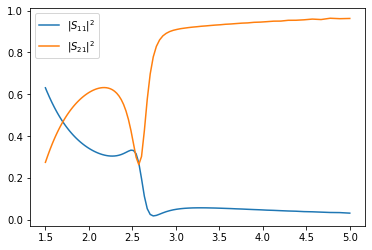

In [14]:
plt.plot(wl, np.abs(a/c)**2, label='$|S_{11}|^2$')
plt.plot(wl, np.abs(b/c)**2, label='$|S_{21}|^2$')
plt.legend()

Save S parameters to xlsx file

In [15]:
# Save S parameter data to xmls
import pandas as pd

f = np.array(freqs)
df = pd.DataFrame(data={'f': f, 'R': a/c, 'T': b/c, 'a': a, 'b': b, 'c': c})
df.to_excel('s_params_yy.xlsx')

---

#### Retrieval

In [16]:
k = 2*np.pi/wl
prepad = st-dpml-0.2-l/2
postpad = st-dpml-0.1-l/2

# S11 = a/c * np.exp(-1j*k*(2*prepad+0.2))
# S21 = b/c * np.exp(-1j*k*(prepad+0.2)-1j*k*postpad)
S11 = a/c * np.exp(-1j*k*(2*prepad))
S21 = b/c * np.exp(-1j*k*(prepad)-1j*k*postpad)

In [17]:
# Save results in excel file
df = pd.DataFrame(data={'f': f, 'S11': S11, 'S21': S21})
df.to_excel('results/s_params_mag.xlsx')

In [18]:
def retrieve(S11, S21, branch=0):
    z = np.sqrt(((1+S11)**2-S21**2)/((1-S11)**2-S21**2))
    einkd = S21/(1-S11*(z-1)/(z+1))
    n = 1/(k*l) * ((np.imag(np.log(einkd))+2*np.pi*branch) - 1j*np.real(np.log(einkd)))

    eps = n/z
    mu = n*z

    return [eps, mu, n, z]

In [19]:
branch = 0

z = np.sqrt(((1+S11)**2-S21**2)/((1-S11)**2-S21**2))
einkd = S21/(1-S11*(z-1)/(z+1))
n = 1/(k*l) * ((np.imag(np.log(einkd))+2*np.pi*branch) - 1j*np.real(np.log(einkd)))

eps = n/z
mu = n*z

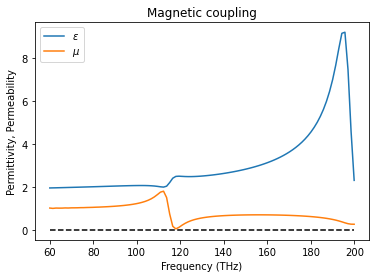

In [20]:
plt.plot(np.array(freqs)*c_/1e6, np.real(eps), label='$\epsilon$')
plt.plot(np.array(freqs)*c_/1e6, np.real(mu), label='$\mu$')
plt.plot(np.array(freqs)*c_/1e6, np.zeros(nfreqs), '--', color='black')
plt.legend()
plt.title('Magnetic coupling')
plt.xlabel('Frequency (THz)')
plt.ylabel('Permittivity, Permeability')
# plt.xlim(60, 150)
# plt.ylim(-2.5, 2.5)

# Save figure
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
plt.savefig('results/s_params_mag'+timestr+'.png', dpi=300)